# Model Training

1.1 Import Data Re  quired Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("C:/Users/DJ668WN/Downloads/Ml_Project/notebook/data/stud.csv")

## Show Top 5 Records

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and y variable

In [4]:
X = df.drop(columns="math_score", axis=1)

In [6]:
X.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
cat_columns = df.select_dtypes(include="O")

for categories in cat_columns.columns:
    cat_g = df[categories].unique()
    print(f"Categories in {categories} are {cat_g}")
    print(f"*_"* 50)

Categories in gender are ['female' 'male']
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Categories in race_ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Categories in parental_level_of_education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Categories in lunch are ['standard' 'free/reduced']
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Categories in test_preparation_course are ['none' 'completed']
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_


In [10]:
y = df["math_score"]
y.head(5)

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

## Create column transformer with 3 types of transformers

In [12]:
num_features = X.select_dtypes(exclude="O").columns
cat_features = X.select_dtypes(include="O").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandsrdScaler", numerical_transformer, num_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

## Separate dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

## Creating an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predict):
    mae = mean_absolute_error(true, predict)
    rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors-Regressor" : KNeighborsRegressor(),
    "Decision - Tree - Regressor" : DecisionTreeRegressor(),
    "Random - Forest - Regressor" : RandomForestRegressor(),
    "XGB - Regressor" : XGBRegressor(),
    "Cat-Boosting-Regressor" : CatBoostRegressor(),
    "Ada - Boost - Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluste Traing and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2_square = evaluate_model(true=y_train, predict=y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2_square = evaluate_model(true=y_test, predict=y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("R 2 Square : {:.4f}".format(model_train_r2_square))
    print(f"*-"*20)

    print(f"Model Performance for Test set")
    print("Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("R2 Score : {:.4f}".format(model_test_r2_square))
    r2_list.append(model_test_r2_square)


Linear Regression
Model performance for training set
Root Mean Squared Error : 5.3231
Mean Absolute Error : 4.2667
R 2 Square : 0.8743
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model Performance for Test set
Root Mean Square Error: 5.3940
Mean Absolute Error : 4.2148
R2 Score : 0.8804
Lasso
Model performance for training set
Root Mean Squared Error : 6.5938
Mean Absolute Error : 5.2063
R 2 Square : 0.8071
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model Performance for Test set
Root Mean Square Error: 6.5197
Mean Absolute Error : 5.1579
R2 Score : 0.8253
Ridge
Model performance for training set
Root Mean Squared Error : 5.3233
Mean Absolute Error : 4.2650
R 2 Square : 0.8743
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model Performance for Test set
Root Mean Square Error: 5.3904
Mean Absolute Error : 4.2111
R2 Score : 0.8806
K-Neighbors-Regressor
Model performance for training set
Root Mean Squared Error : 5.7079
Mean Absolute Error : 4.5168
R 2 Square : 0.8555
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

# Result

In [50]:
result_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by="R2_Score", ascending=False)

In [53]:
from prettytable import PrettyTable
table = PrettyTable()

table.add_column("Model name",list(result_df["Model Name"]))
table.add_column("R2_Score", list(result_df["R2_Score"]))
print(table)

+-----------------------------+--------------------+
|          Model name         |      R2_Score      |
+-----------------------------+--------------------+
|            Ridge            | 0.8805931485028738 |
|      Linear Regression      | 0.8804332983749565 |
| Random - Forest - Regressor | 0.8536329390669993 |
|    Cat-Boosting-Regressor   | 0.8516318920747058 |
|   Ada - Boost - Regressor   | 0.8497475255391777 |
|       XGB - Regressor       | 0.8277965784072876 |
|            Lasso            | 0.8253197323627852 |
|    K-Neighbors-Regressor    | 0.7838129945787431 |
| Decision - Tree - Regressor | 0.7364164472191812 |
+-----------------------------+--------------------+


# Linear Regression

In [39]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X=X_train, y=y_train)
y_pred = lin_model.predict(X=X_test)
score = r2_score(y_true=y_test, y_pred=y_pred)
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 0.88


Text(0, 0.5, 'Prediction')

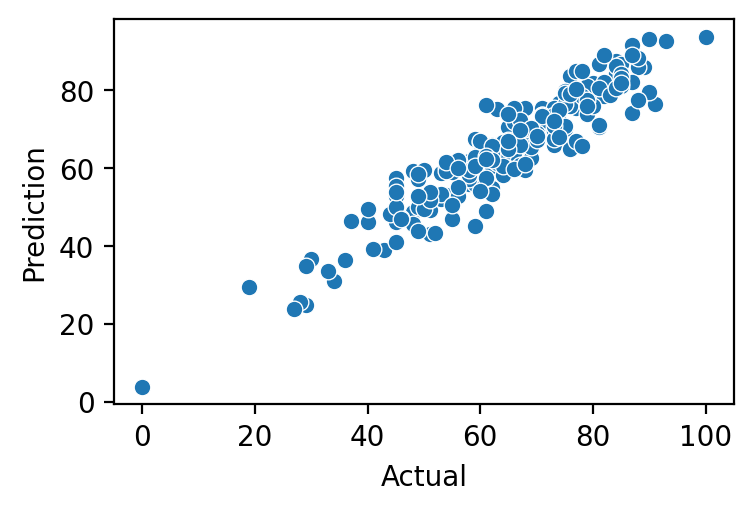

In [49]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=200)

sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")

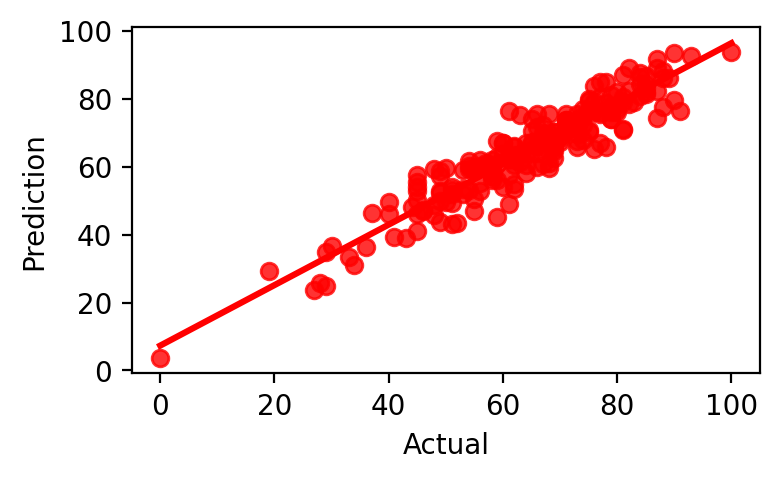

In [48]:
fig, ax = plt.subplots(figsize =(4,2.5), dpi=200)

sns.regplot(x=y_test, y=y_pred, ci=None, color="red", ax=ax)
ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
plt.tight_layout()

In [45]:
predicted_data = pd.DataFrame(list(zip(y_test, y_pred)), columns=["Actual", "Prediction"])

predicted_data["Difference"] = predicted_data["Actual"] - predicted_data["Prediction"]

predicted_data

,Actual,Prediction,Difference
0,91,76.387970,14.612030
1,53,58.885970,-5.885970
2,80,76.990265,3.009735
3,74,76.851804,-2.851804
4,84,87.627378,-3.627378
...,...,...,...
195,52,43.409149,8.590851
196,62,62.152214,-0.152214
197,74,67.888395,6.111605
198,65,67.022287,-2.022287


In [54]:
from prettytable import from_csv
with open("C:/Users/DJ668WN/Downloads/Ml_Project/notebook/data/stud.csv") as fp:
    mytable = from_csv(fp)

In [55]:
print(mytable)

+--------+----------------+-----------------------------+--------------+-------------------------+------------+---------------+---------------+
| gender | race_ethnicity | parental_level_of_education |    lunch     | test_preparation_course | math_score | reading_score | writing_score |
+--------+----------------+-----------------------------+--------------+-------------------------+------------+---------------+---------------+
| female |    group B     |      bachelor's degree      |   standard   |           none          |     72     |       72      |       74      |
| female |    group C     |         some college        |   standard   |        completed        |     69     |       90      |       88      |
| female |    group B     |       master's degree       |   standard   |           none          |     90     |       95      |       93      |
|  male  |    group A     |      associate's degree     | free/reduced |           none          |     47     |       57      |       44